In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from transformers import BertTokenizer
import torch.nn.functional as F
import torch
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, wilcoxon, ttest_rel

In [5]:
# 'bert-base-multilingual-uncased', 
MODELS = ['bert-base-uncased', 'models/less_based-kl_div-epoch_30_batch_16_lr_2e-6']
target_path = Path('runs') / 'crows_pairs/data/crows_pairs_anonymized.csv/'

--- bert-base-uncased ---
-26.042326259946947 -26.594173076923077
Ttest_relResult(statistic=-5.105050751946537, pvalue=3.7280960475557394e-07)
WilcoxonResult(statistic=421913.5, pvalue=3.619166226392026e-18)
--- models/less_based-kl_div-epoch_30_batch_16_lr_2e-6 ---
-29.248515915119366 -29.322086206896554
Ttest_relResult(statistic=-1.2409326990114085, pvalue=0.2148237504105393)
WilcoxonResult(statistic=528877.5, pvalue=0.017986531883779206)


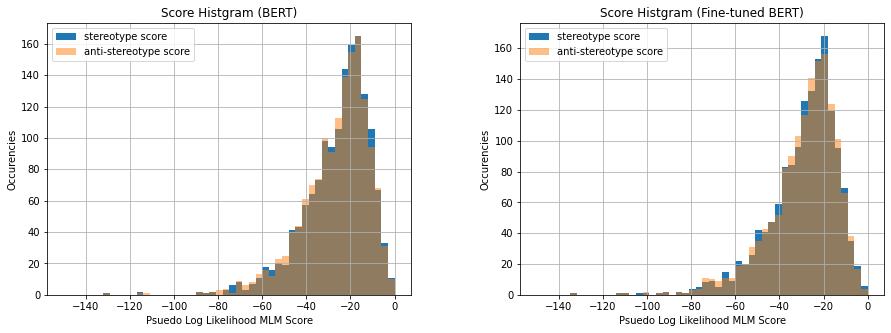

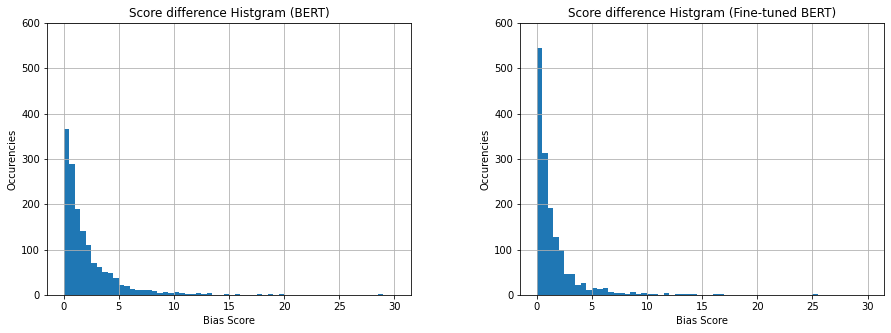

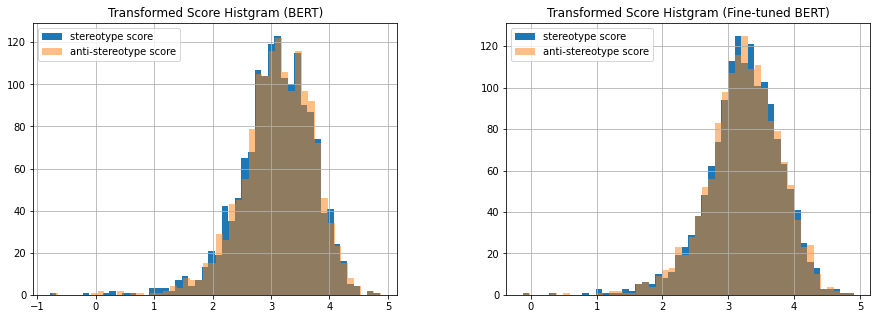

In [42]:
fig1, ax1 = plt.subplots(1, len(MODELS), figsize=[15.0, 5.0])
fig2, ax2 = plt.subplots(1, len(MODELS), figsize=[15.0, 5.0])
fig3, ax3 = plt.subplots(1, len(MODELS), figsize=[15.0, 5.0])
# indeces = range(0, 1508)
# indeces = np.random.choice(indeces, 500)

names = ['BERT', 'Fine-tuned BERT']

df_dict = {}
for n, model in enumerate(MODELS):
    print(f'--- {model} ---')
    df_dict[model] = pd.read_csv(target_path / model / 'results.csv')
    df = df_dict[model]# .iloc[indeces]
    print(df['sent_more_score'].mean(), df['sent_less_score'].mean())
    df['sent_score_diff'] = np.abs(df['sent_more_score'] - df['sent_less_score'])
    df['log_sent_more_score'] = np.log(-df['sent_more_score'])
    df['log_sent_less_score'] = np.log(-df['sent_less_score'])
    t_result = ttest_rel(df['log_sent_more_score'], df['log_sent_less_score'])
    print(t_result)
    w_result = wilcoxon(df['sent_more_score'], df['sent_less_score'], zero_method='zsplit', correction=True)
    print(w_result)

    df.hist('sent_more_score', ax=ax1[n], bins=50, label='stereotype score', range=[-150, 0])
    df.hist('sent_less_score', ax=ax1[n], bins=50, alpha=.5, label='anti-stereotype score', range=[-150, 0])
    ax1[n].set_title(f'Score Histgram ({names[n]})')
    ax1[n].set_xlabel('Psuedo Log Likelihood MLM Score')
    ax1[n].set_ylabel('Occurencies')
    ax1[n].legend(loc='upper left')


    df.hist('sent_score_diff', ax=ax2[n], bins=60, range=[0, 30])
    ax2[n].set_title(f'Score difference Histgram ({names[n]})')
    ax2[n].set_xlabel('Bias Score')
    ax2[n].set_ylabel('Occurencies')
    ax2[n].set_ylim([0, 600])
    
    df.hist('log_sent_more_score', label='stereotype score', ax=ax3[n], bins=50)
    df.hist('log_sent_less_score', label='anti-stereotype score', ax=ax3[n], bins=50, alpha=.5)
    ax3[n].set_title(f'Transformed Score Histgram ({names[n]})')
    ax3[n].legend(loc='upper left')